# Estadistica Aplicada
## Ricardo de Jesús Cervantes García 1958971
## 2 de octubre

In [3]:
## 1-Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [5]:
## configurar tamaño de gráfica
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12
plt.rcParams['axes.labelsize']=12

In [7]:
pasajeros=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv',index_col='Month',parse_dates=True)

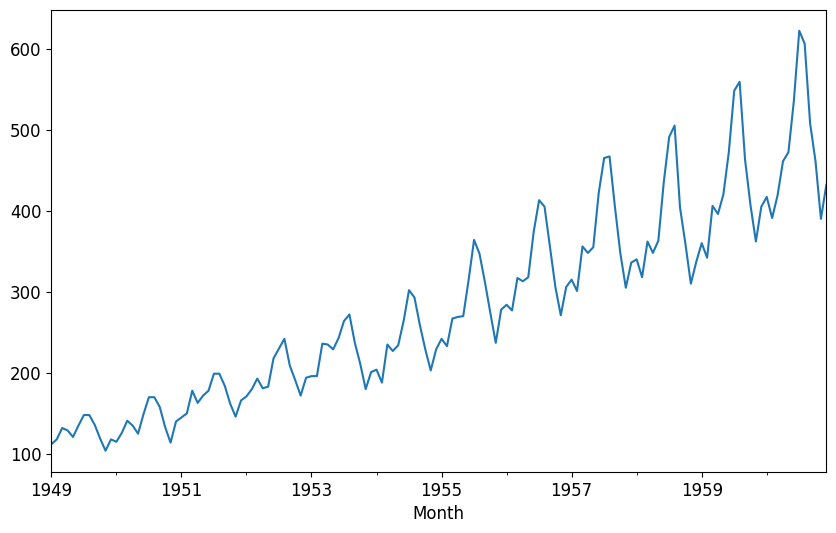

In [8]:
pasajeros['Thousands of Passengers'].plot();

In [9]:
## promedio movil simple a 12 meses
pasajeros['PMS-12']=pasajeros['Thousands of Passengers'].rolling(12).mean()

In [11]:
##Promedio movil centrado a 11 meses
pasajeros['PMC-11']=pasajeros['Thousands of Passengers'].rolling(11,center=True).mean()

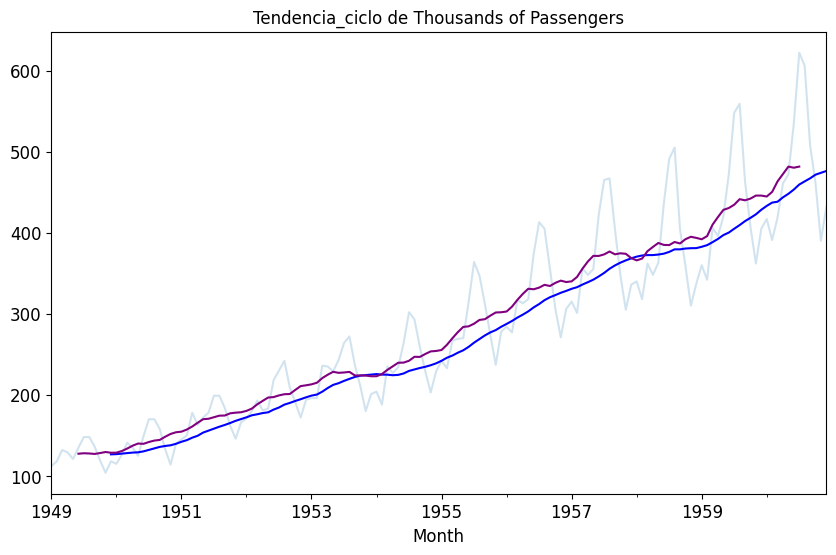

In [18]:
##Gráficar la serie original vs PMS-12 vs PMC-11
pasajeros['Thousands of Passengers'].plot(alpha=0.2)
pasajeros['PMS-12'].plot(color='blue')
pasajeros['PMC-11'].plot(color='purple')
plt.title('Tendencia_ciclo de Thousands of Passengers');

In [20]:
## Suavizamiento exponencial 
pasajeros['SE']=pasajeros['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

In [21]:
pasajeros.index
# Asignarle fecuencia-mensual
#mensual MS (month start)
pasajeros=pasajeros.asfreq('MS')

generalmente para utilizar una serie de tiempo debe de haber una variable de fecha y debe tener un frecuencia asignada

In [25]:
## Suavizamiento exponencial doble
## 1 serie original 2 tendencia
pasajeros['SED']=ExponentialSmoothing(pasajeros['Thousands of Passengers'],trend='mul')